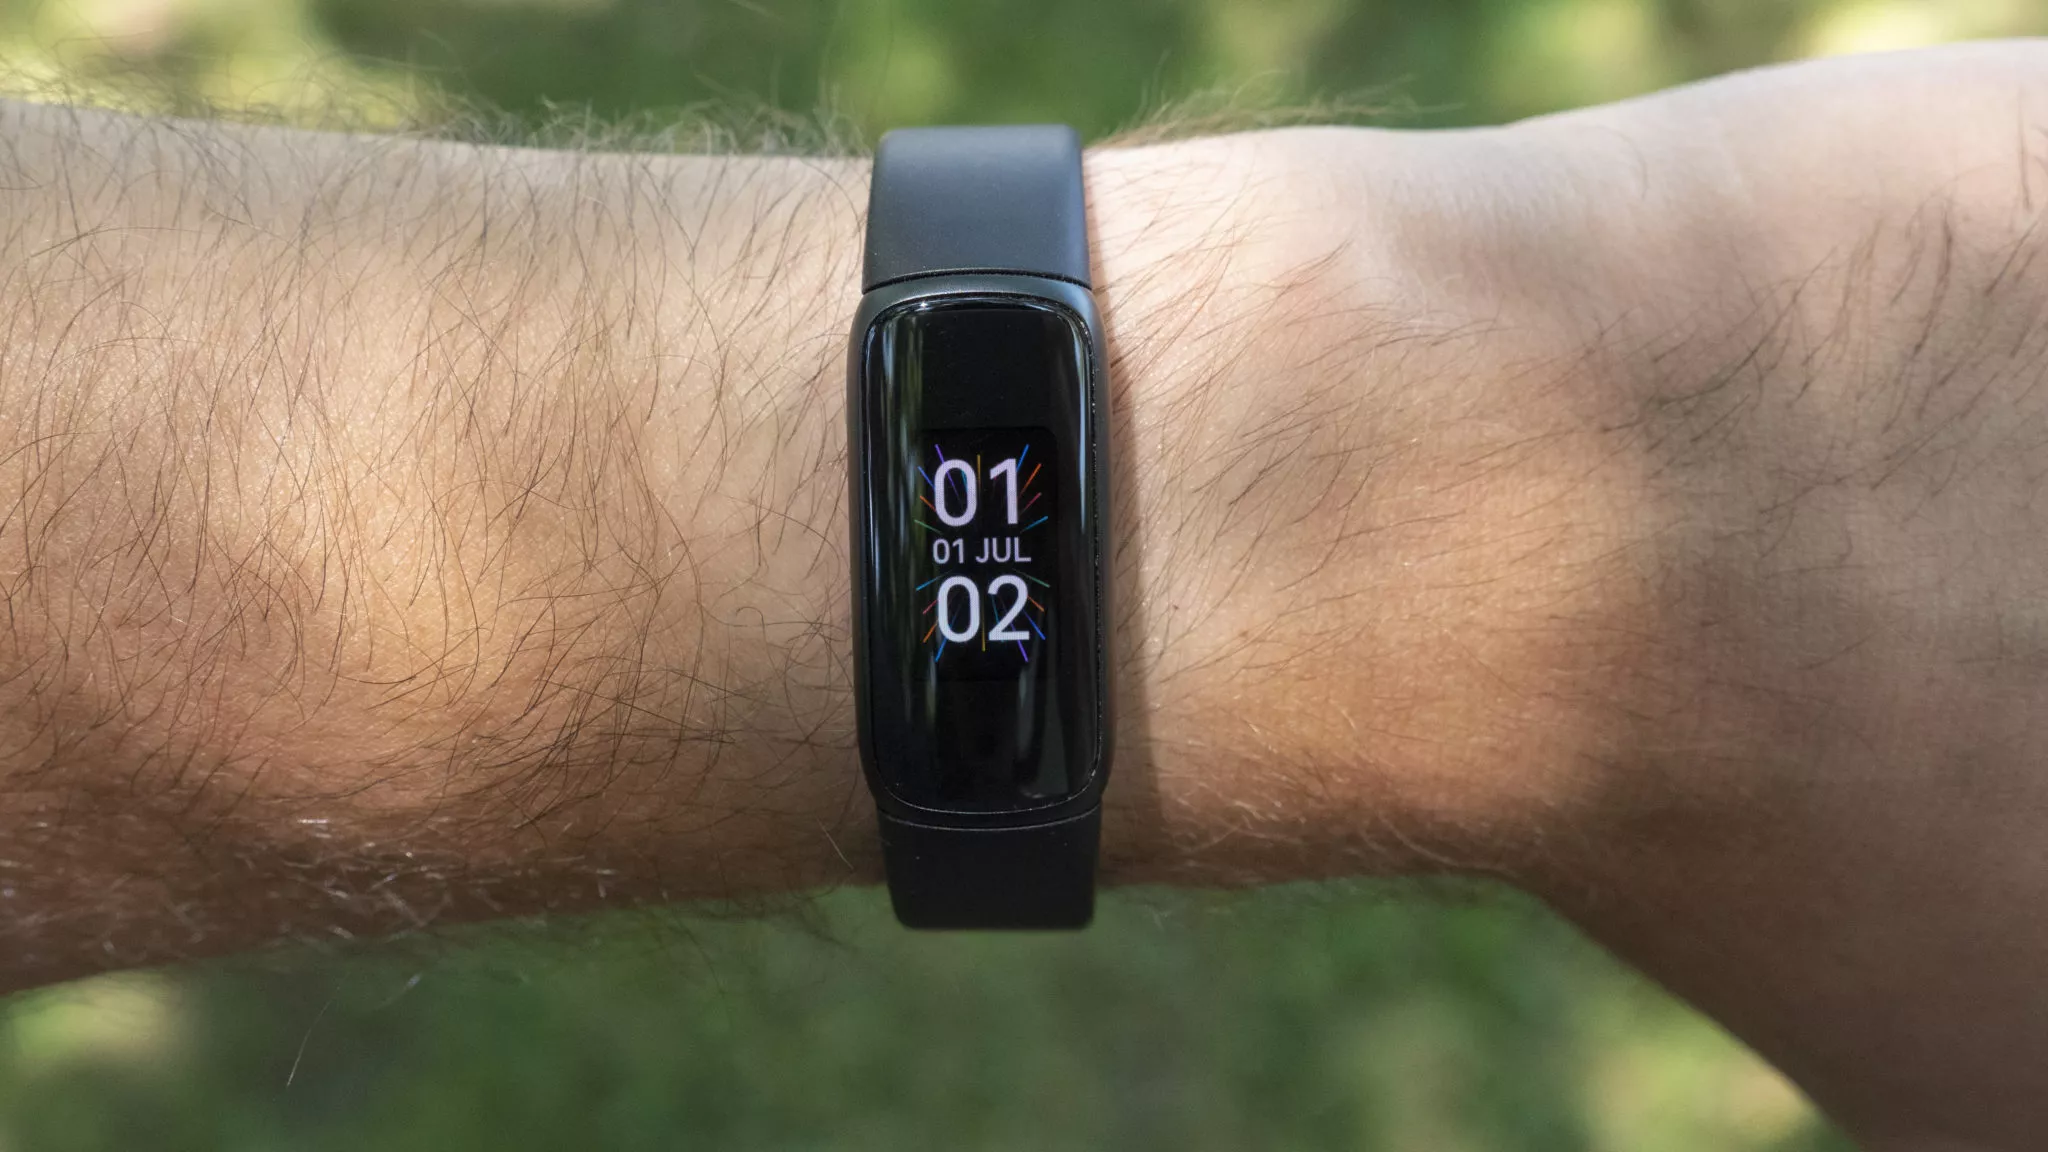

image from :https://www.androidauthority.com/fitbit-luxe-review-1238837/


According to 'help.fitbit.com',

Your overall sleep score is a sum of your individual scores in sleep duration, sleep quality, and restoration, for a total score of up to 100. Most people get a score between 72 and 83. Sleep score ranges are:
* Excellent: 90-100
* Good: 80-89
* Fair: 60-79
* Poor: Less than 60

Duration: Time asleep and awake	How much you slept—the more you sleep, the better your score.

Quality: Deep & REM sleep	How much time you spent in deep and REM sleep—the more time you spend in these sleep stages, the better your score.

Restoration: Sleeping heart rate & restlessness	How relaxed you were during sleep—a high sleeping heart rate or too much tossing and turning lowers your score.

reference: https://help.fitbit.com/articles/en_US/Help_article/2439.htm

So I tried finding how we can get score 80 and more !

# Importing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_Feb=pd.read_csv('/kaggle/input/sleep-data-from-fitbit-tracker/February sleep data - Sheet1 (1).csv')
df_Dec=pd.read_csv('/kaggle/input/sleep-data-from-fitbit-tracker/December Sleep data - Sheet1.csv')
df_Nov=pd.read_csv('/kaggle/input/sleep-data-from-fitbit-tracker/November Sleep Data - Sheet1.csv')
df_Jan=pd.read_csv('/kaggle/input/sleep-data-from-fitbit-tracker/January sleep data - Sheet1.csv')

In [ ]:
df_Feb.head()

In [ ]:
df_Dec.head()

In [ ]:
df_Nov.head()

In [ ]:
df_Jan.head()

# Feature Engineering

* I merged four files into one.

In [ ]:
df_Nov=df_Nov.rename(columns={'NOVEMBER': 'Day'})
df_Dec=df_Dec.rename(columns={'DECEMBER': 'Day'})
df_Jan=df_Jan.rename(columns={'JANUARY': 'Day'})
df_Jan=df_Jan.rename(columns={'HEART RATE UNDER RESTING': 'HEART RATE BELOW RESTING'})
df_Feb=df_Feb.rename(columns={'FEBEUARY': 'Day'})
df_Feb=df_Feb.rename(columns={'SLEEP SQORE': 'SLEEP SCORE'})
df=pd.concat([df_Nov, df_Dec,df_Jan,df_Feb])

* There are some NaNs in data. So I droped NaN.

In [ ]:
df=df.dropna()

In [ ]:
df.info()

* I found some different type of data in some coulumns, so I fixed them.

In [ ]:
df['HOURS OF SLEEP'] = df['HOURS OF SLEEP'].replace('6:46', '6:46:00')
df['HOURS OF SLEEP'] = df['HOURS OF SLEEP'].replace('6:06', '6:06:00')

* I changed 'DATE'  to Datetime format and,
* Changed 'HOURS OF SLEEP' from timedelta64 to int, 'second'.
* I also made 'Month', 'Week' and 'Day' columns.

In [ ]:
df['DATE']=pd.to_datetime(df['DATE'],format='%m/%d/%Y')

baseline=pd.to_datetime('00:00:00',format='%H:%M:%S')
df['HOURS OF SLEEP']=pd.to_datetime(df['HOURS OF SLEEP'],format='%H:%M:%S')-baseline
df['SECONDS OF SLEEP'] = df['HOURS OF SLEEP'].astype(int)/1000000000
                                    
df['Week']=df['DATE'].dt.weekday
df['Month']=df['DATE'].dt.month
df['Day']=df['DATE'].dt.day

* I changed 'REM SLEEP', 'DEEP SLEEP' and 'HEART RATE BELOW RESTING' to float.

In [ ]:
df['REM SLEEP']=df['REM SLEEP'].str[:-1]
df['DEEP SLEEP']=df['DEEP SLEEP'].str[:-1]
df['HEART RATE BELOW RESTING']=df['HEART RATE BELOW RESTING'].str[:-1]

In [ ]:
df['REM SLEEP']=df['REM SLEEP'].astype(float)/100
df['DEEP SLEEP']=df['DEEP SLEEP'].astype(float)/100
df['HEART RATE BELOW RESTING']=df['HEART RATE BELOW RESTING'].astype(float)/100

* I split 'SLEEP TIME' to 'Sleep_start' and 'Sleep_end' columns.

In [ ]:
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11:21 - 8:45am', '11:21pm - 8:45am')
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11:40pm - 7:33', '11:40pm - 7:33am')
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11:16pm - 7:02', '11:16pm - 7:02am')
df['SLEEP TIME'] = df['SLEEP TIME'].replace('11-38pm - 8:23am', '11:38pm - 8:23am')

In [ ]:
df1=df['SLEEP TIME'].str.split('-', expand=True)
df1.columns = ['Sleep_start', 'Sleep_end']

In [ ]:
df1['Sleep_start']=df1['Sleep_start'].str[:-3]
df1['Sleep_end']=df1['Sleep_end'].str[:-2]
df1['Sleep_end']=df1['Sleep_end'].str[0:]

In [ ]:
df1['Sleep_end'] = df1['Sleep_end'].str.replace(' ', '')

In [ ]:
df1['Sleep_start']=pd.to_datetime(df1['Sleep_start'],format='%H:%M')
df1['Sleep_end']=pd.to_datetime(df1['Sleep_end'],format='%H:%M')

In [ ]:
df=pd.concat([df, df1],axis=1)

In [ ]:
df['Sleep_start']=df['Sleep_start'].dt.time
df['Sleep_end']=df['Sleep_end'].dt.time

In [ ]:
df=df.drop(['SLEEP TIME','HOURS OF SLEEP'],axis=1)


In [ ]:
df = df.reset_index()
df=df.drop('index',axis=1)

# New Data Set which is feature engineered

In [ ]:
df

In [ ]:
df.info()

# Visualization

* Time series SLEEP SCORE

In [ ]:
df.plot(x='DATE',y='SLEEP SCORE',figsize=(15,8))

* Time Series SECONDS OF SLEEP

In [ ]:
df.plot(x='DATE',y='SECONDS OF SLEEP',figsize=(15,8))

* SLEEP SCORE by Day

In [ ]:
df.groupby('Day')['SLEEP SCORE'].describe().plot(figsize=(15,8))

* SLEEP SCORE by Week

In [ ]:
df.groupby('Week')['SLEEP SCORE'].describe().plot(figsize=(15,8))

* SLEEP SCORE by Month

In [ ]:
df.groupby('Month')['SLEEP SCORE'].describe().plot.bar(figsize=(15,8))

It seems that there are no serious impact by month, week and day.

In [ ]:
sns.pairplot(df,kind='reg',vars=['SLEEP SCORE','SECONDS OF SLEEP','REM SLEEP','DEEP SLEEP','HEART RATE BELOW RESTING'])

In [ ]:
sns.pairplot(df,hue='SLEEP SCORE',vars=['SECONDS OF SLEEP','REM SLEEP','DEEP SLEEP','HEART RATE BELOW RESTING'])

In [ ]:
df1=df.drop(['Day','Week','Month'],axis=1)

In [ ]:
sns.heatmap(df1.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

# Classification Model- Compare 6 models
I refered notebook '6 Classification Methods in Machine Learning'
https://www.kaggle.com/code/alihantabak/6-classification-methods-in-machine-learning/notebook

* I split data to 'over 80 SLEEP SCORE' =1 and 'below 80 SLEEP SCORE'=0 to classify data good or bad.

In [ ]:
def score_judge(ex):
    if ex >= 80:
        return 1
    else:
        return 0

In [ ]:
df1.loc[:,'Evaluation']=df1.loc[:,'SLEEP SCORE'].apply(score_judge)
df1.head()

In [ ]:
df1.groupby('Evaluation')['REM SLEEP'].mean().plot.bar()

In [ ]:
df1.groupby('Evaluation')['DEEP SLEEP'].mean().plot.bar()

In [ ]:
df1.groupby('Evaluation')['SECONDS OF SLEEP'].mean().plot.bar()

In [ ]:
df1.groupby('Evaluation')['HEART RATE BELOW RESTING'].mean().plot.bar()

I can find the difference between evaluation 0 and 1 in 'REM SLEEP' ,'DEEP SLEEP','SECONDS OF SLEEP' and 'HEART RATE BELOW RESTING' 

In [ ]:
df2=df1.drop(['DATE','Sleep_start','Sleep_end','SLEEP SCORE'],axis=1)

In [ ]:
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
X=df2.drop('Evaluation',axis=1)
y=df2['Evaluation']

In [ ]:
X_norm = (X - np.min(X)) / (np.max(X)).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.3,random_state=42)
method_names = []
method_scores = []

* LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(X_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(X_test,y_test))

y_pred = log_reg.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

* KNN (K-Nearest Neighbour) CLASSIFICATION

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
print("Score for Number of Neighbors = 8: {}".format(knn.score(X_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(X_test,y_test))

y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

* SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(X_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(X_test,y_test))

y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

* NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(X_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(X_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

* DECISION TREE 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(X_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(X_test,y_test))

y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

* RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(X_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(X_test,y_test))

y_pred = rand_forest.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.ylim([0.85,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

In 6 classification models, I got highest accuracy with NAIVE BAYES.

# Conclusion

As a conclusion, how we can have enough and deep sleep is very impoerant, but we also have to take care of heart rate which we may not mind when we sleep.

I found the article 'What Is a Normal Sleeping Heart Rate?' which tell us how we can prevent "High Sleeping Heart Rate".
https://www.sleepfoundation.org/physical-health/sleeping-heart-rate


According to this article,

With the possible exception of REM sleep, your heart rate should typically be lower during sleep than when you are awake. High heart rates are connected with taking longer to fall asleep and experiencing lower sleep quality, as well as an increased risk of cardiovascular disease.

* Stress and anxiety: Anxiety leads to an increased heart rate and higher blood pressure 12. Prolonged stress and anxiety can increase heart rate13 during sleep. Poor sleep, in turn, can negatively impact heart rate and blood pressure14 during the day.
* Sleep behaviors: Poor sleep hygiene can also contribute to a higher sleeping heart rate. One study found that shifting bedtime just 30 minutes later can raise resting heart rate15 during sleep, with effects that last into the following day. Waking up in the middle of the night can also increase your sleeping heart rate, as can nightmares16.
* Pregnancy: As pregnancy progresses, heart rate may climb as it adapts to supply vital oxygen and nutrients to the growing fetus17. Regular exercise may help lower resting heart rate and boost heart health18 during pregnancy.
* Other factors: Being sick with a fever can increase your heart rate. Certain medications may also increase heart rate. Caffeine and exercise can also trigger an increase in heart rate.

An increase in heart rate is not always a cause for emergency. Heart rate can temporarily rise for a number of normal reasons, from stress to exercise, and slow back down on its own. However, if it continues to stay elevated, contact a medical professional. In some cases, a high heart rate can signal an underlying health condition.

Thank you !